In [91]:
import pandas as pd
from pathlib import Path
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmspe, rmse, aic, bic
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

plt.style.use('default')
plt.rcParams["figure.figsize"] = [10, 5]

In [43]:
file = Path('../../datasets/Ch9/milk_production.csv')
milk = pd.read_csv(file, 
                   index_col='month', 
                   parse_dates=True)

<AxesSubplot:xlabel='month'>

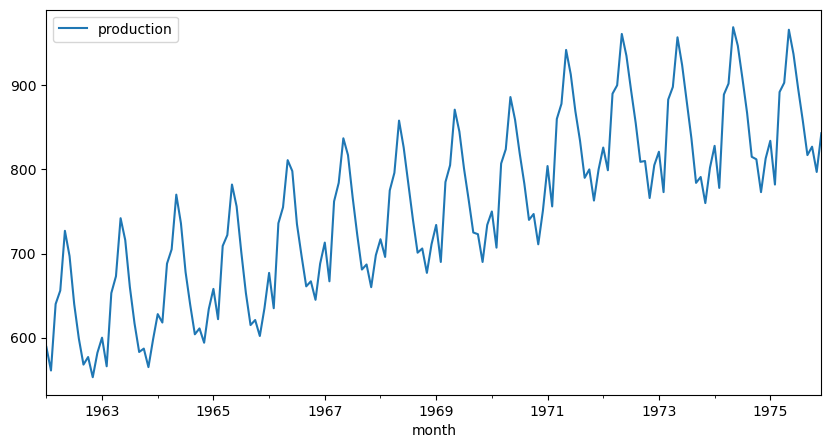

In [44]:
milk.plot()

In [45]:
milk.describe()

,production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


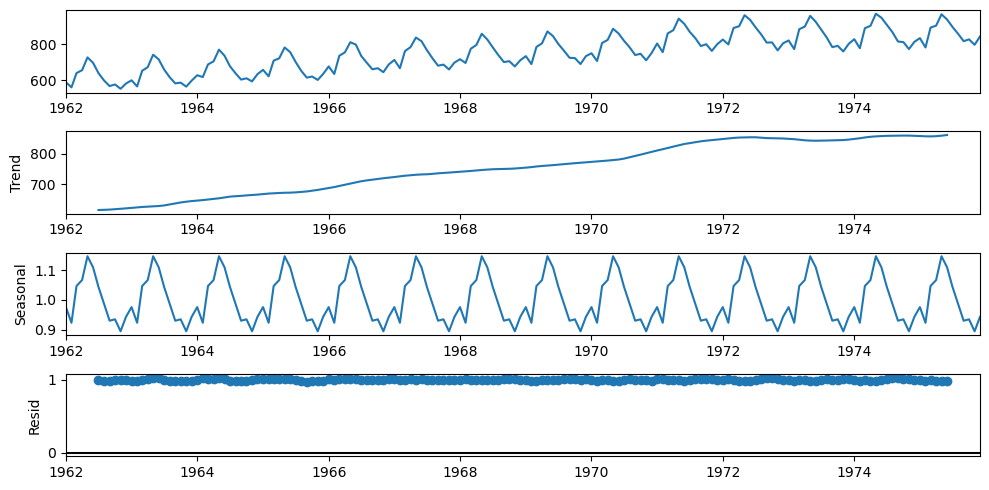

In [113]:
decomposed = seasonal_decompose(milk,  model='multiplicative')
_ = decomposed.plot()

In [114]:
adfuller(milk)

(-1.3038115874221248,
 0.6274267086030337,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [134]:
milk_ns = milk / decomposed.seasonal

In [135]:
seasonal = decomposed.seasonal.to_frame()
seasonal.columns = ['production']
milk_ns = milk / seasonal

<AxesSubplot:xlabel='month'>

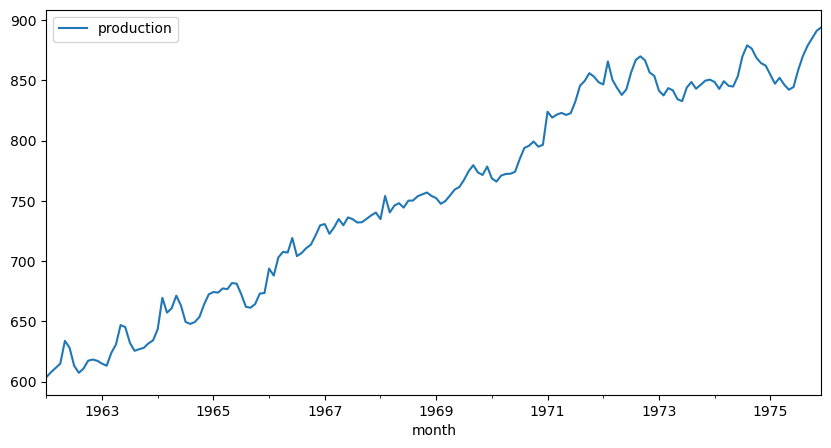

In [136]:
milk_ns.plot()

<AxesSubplot:xlabel='month'>

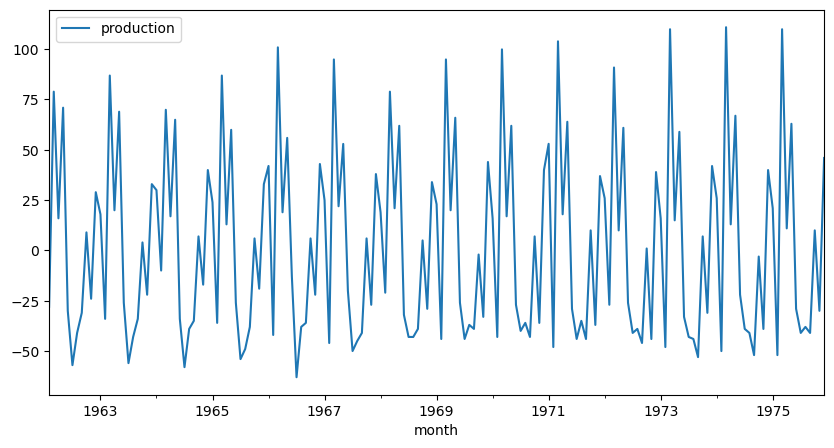

In [118]:
milk_ns_nt = milk_ns.diff().dropna()
milk_ns_nt.plot()

In [87]:
adfuller(milk_ns_nt)

(-3.0549860629319046,
 0.030068785571483604,
 14,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 1107.6700456976464)

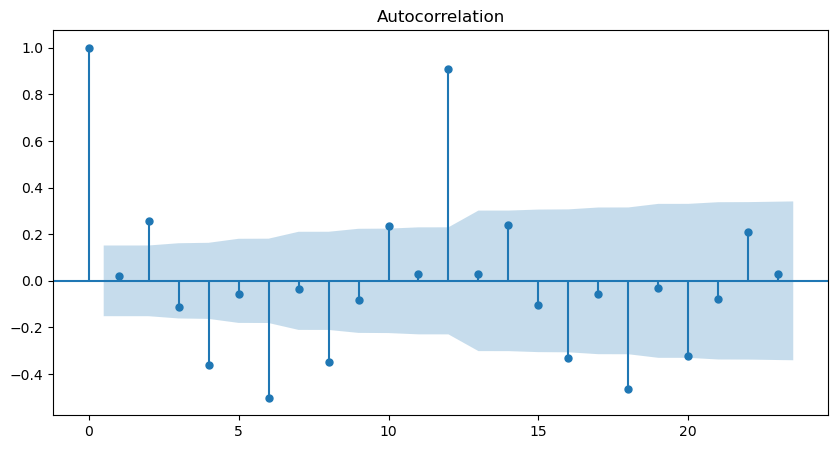

In [88]:
_ = plot_acf(milk_ns_nt)

/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


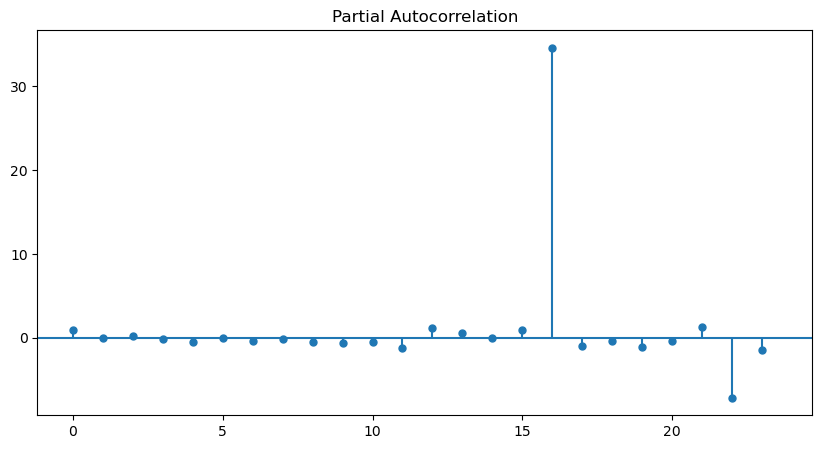

In [89]:
_ = plot_pacf(milk_ns_nt)

In [94]:
m = auto_arima(milk_ns, start_p=0, start_q=0, max_p=5, max_q=5, m=0, d=0, max_d=5,
                seasonal=False,trace=True, 
                error_action='ignore',   # don't want to know if an order does not work
                suppress_warnings=True,  # don't want convergence warnings
                stepwise=True)           # set to stepwise
m.fit(milk_ns)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2707.806, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2496.226, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1769.103, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1745.376, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1745.680, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1733.629, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1747.587, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1729.784, Time=0.30 sec
 A

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [106]:
742/724

1.0248618784530388

In [112]:
pd.concat([seasonal, milk, decomposed.trend.to_frame()], axis=1).head(36)

,production,production,trend
month,,,
1962-01-01,0.975654,589,NaN
1962-02-01,0.922938,561,NaN
1962-03-01,1.046692,640,NaN
1962-04-01,1.066782,656,NaN
1962-05-01,1.146867,727,NaN
1962-06-01,1.109554,697,NaN
1962-07-01,1.043724,640,616.208333
1962-08-01,0.986225,599,616.875000
1962-09-01,0.929893,568,617.625000
